# Introduction

Our project aims to identify an optimal pricing model using regression techniques to quantify what the reasonable price range of a car would be, which Atlas Motors would use for acquiring used cars for their rental fleet. Since there is complexity in determining the prices of cars due to various factors like COE, OMV and Sales Upselling, our model will reduce the frustrations and time consumption of used car purchases. 

In this study, we would be utilizing data science processes from data collection (web-scraping: BeautifulSoup, Python), data cleaning, exploratory data analysis to the model training and testing stage. The source of data comes SgCarMart, an online car sales portal in Singapore. 

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV


import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df_main = pd.read_csv('sgcarmart_used_cars_prices7.csv',index_col=0)
df_main.sample(5)

,LISTING_URL,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MILEAGE_KM,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,POST_DATE
14771,https://www.sgcarmart.com/used_cars/info.php?I...,Porsche,163800.0,42230.0,12-Nov-2015,49000.0,2015.0,3332.0,Auto,107374.0,27/01/2024,113482.0,176268.0,58190.0,640.0,3605.0,1770.0,2.0,Sports Car,19-Jan-2024
9417,https://www.sgcarmart.com/used_cars/info.php?I...,Toyota,47800.0,14600.0,23-Sep-2016,91000.0,2016.0,742.0,Auto,24477.0,26/01/2024,17982.0,17982.0,51506.0,947.0,1598.0,1205.0,2.0,Mid-Sized Sedan,26-Jan-2024
7392,https://www.sgcarmart.com/used_cars/info.php?I...,Honda,55999.0,17190.0,05-Oct-2016,71000.0,2016.0,742.0,Auto,26546.0,26/01/2024,19491.0,19491.0,55200.0,978.0,1597.0,1249.0,3.0,Mid-Sized Sedan,25-Jan-2024
10865,https://www.sgcarmart.com/used_cars/info.php?I...,BMW,106888.0,15610.0,30-Nov-2010,103000.0,2010.0,3307.0,Auto,27385.0,27/01/2024,81703.0,81703.0,40014.0,2192.0,2979.0,1895.0,5.0,Luxury Sedan,16-Jan-2024
11717,https://www.sgcarmart.com/used_cars/info.php?I...,Mercedes-Benz,128000.0,26540.0,02-Oct-2017,75000.0,2017.0,1202.0,Auto,57779.0,27/01/2024,48990.0,60586.0,50001.0,1339.0,1991.0,1770.0,3.0,SUV,25-Jan-2024


In [3]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16594 entries, 0 to 16593
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LISTING_URL                   16594 non-null  object 
 1   BRAND                         16586 non-null  object 
 2   PRICE                         16432 non-null  float64
 3   DEPRE_VALUE_PER_YEAR          15973 non-null  float64
 4   REG_DATE                      16586 non-null  object 
 5   MILEAGE_KM                    13642 non-null  float64
 6   MANUFACTURED_YEAR             16404 non-null  float64
 7   ROAD_TAX_PER_YEAR             16165 non-null  float64
 8   TRANSMISSION                  16586 non-null  object 
 9   DEREG_VALUE_FROM_SCRAPE_DATE  15740 non-null  float64
 10  SCRAPE_DATE                   16594 non-null  object 
 11  OMV                           16506 non-null  float64
 12  ARF                           16343 non-null  float64
 13  COE_FR

In [4]:
df_main.columns

Index(['LISTING_URL', 'BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE',
       'MILEAGE_KM', 'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR', 'TRANSMISSION',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'SCRAPE_DATE', 'OMV', 'ARF',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'VEHICLE_TYPE', 'POST_DATE'],
      dtype='object')

**Dropping of columns used for Web scraping but not useful in our model**

In [5]:
df_clean = df_main.drop(['LISTING_URL', 'SCRAPE_DATE'],axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16594 entries, 0 to 16593
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         16586 non-null  object 
 1   PRICE                         16432 non-null  float64
 2   DEPRE_VALUE_PER_YEAR          15973 non-null  float64
 3   REG_DATE                      16586 non-null  object 
 4   MILEAGE_KM                    13642 non-null  float64
 5   MANUFACTURED_YEAR             16404 non-null  float64
 6   ROAD_TAX_PER_YEAR             16165 non-null  float64
 7   TRANSMISSION                  16586 non-null  object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  15740 non-null  float64
 9   OMV                           16506 non-null  float64
 10  ARF                           16343 non-null  float64
 11  COE_FROM_SCRAPE_DATE          16022 non-null  float64
 12  DAYS_OF_COE_LEFT              16457 non-null  float64
 13  ENGINE

- BRAND: The brand of the car e.g. TOYOTA, MAZDA, NISSAN
- PRICE: The price of the car listed on SGCarmart, our Target variable 
- DEPRE_VALUE_PER_YEAR: (Cost of Asset – Salvage value of Asset)/ Depreciation Rate per Year
- REG_DATE: The date the car was registered
- MILEAGE_KM: The total distance driven by the car in KM
- MANUFACTURED_YEAR: The year the car was manufactured
- ROAD_TAX_PER_YEAR: Tax the car owner has to pay for using the road. Calculated using a complex formula based on the size and type of the vehicle and its propulsion system
- TRANSMISSION: The gearbox of the car (Either MANUAL or AUTOMATIC)
- DEREG_VALUE_FROM_SCRAPE_DATE: The deregistration value of a vehicle is amount one will get back from the government upon deregistering the vehicle for use in Singapore. 
    - It is the sum of the COE rebate and the PARF rebate.The COE rebate is a percentage of the original COE value.The PARF rebate is a percentage of the original OMV (Open Market Value).
- OMV: OMV is Open Market Value. It is the actual price of the vehicle. This price is not inclusive of COE, ARF, registration fees, taxes and surcharges . OMV prices can differ even if it is the same vehicle make and model.
- ARF: The Additional Registration Fee (ARF) is a tax imposed upon registration of a vehicle. It is calculated based on a percentage of the Open Market Value (OMV) of the vehicle.
- COE_FROM_SCRAPE_DATE: Certificate of entitlement. It is an amount that you pay the Land Transport Authority (LTA) for registering your car in Singapore for local use.
- DAYS_OF_COE_LEFT: Number of days left till COE renewal 
- ENGINE_CAPACITY_CC: Size of the Engine
- CURB_WEIGHT_KG: Curb weight is the total weight (mass) of an automobile when not loaded with either passengers or cargo.
- NO_OF_OWNERS: Number of past owners for this vehicle
- VEHICLE_TYPE: Type of the vehicle e.g. SUV, Hatchback, Sports Car
- POST_DATE: The date the vehicle was listed on SGCarmart

# Data Visualizations

### Numerical Data Distribution

In [6]:
num_var=['PRICE',
         'DEPRE_VALUE_PER_YEAR',
         'MILEAGE_KM',
         'ROAD_TAX_PER_YEAR',
         'DEREG_VALUE_FROM_SCRAPE_DATE',
         'OMV',
         'ARF',
         'COE_FROM_SCRAPE_DATE',
         'DAYS_OF_COE_LEFT',
         'ENGINE_CAPACITY_CC',
         'CURB_WEIGHT_KG',
         'NO_OF_OWNERS'
        ]

df_num=df_clean[num_var]
df_num.head()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS
0,80800.0,22520.0,121000.0,1202.0,51892.0,52959.0,67327.0,54920.0,762.0,1991.0,1680.0,2.0
1,18000.0,15330.0,NaN,1144.0,10880.0,24683.0,11557.0,63990.0,277.0,1560.0,1520.0,2.0
2,130800.0,20890.0,29000.0,976.0,45808.0,30800.0,35120.0,35906.0,1976.0,1798.0,1430.0,2.0
3,196800.0,39190.0,NaN,1194.0,77147.0,63495.0,86291.0,53711.0,1126.0,1984.0,1845.0,3.0
4,222800.0,29500.0,30500.0,1792.0,60821.0,37576.0,44607.0,40301.0,2466.0,2493.0,1920.0,2.0


array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'DEPRE_VALUE_PER_YEAR'}>,
        <Axes: title={'center': 'MILEAGE_KM'}>],
       [<Axes: title={'center': 'ROAD_TAX_PER_YEAR'}>,
        <Axes: title={'center': 'DEREG_VALUE_FROM_SCRAPE_DATE'}>,
        <Axes: title={'center': 'OMV'}>],
       [<Axes: title={'center': 'ARF'}>,
        <Axes: title={'center': 'COE_FROM_SCRAPE_DATE'}>,
        <Axes: title={'center': 'DAYS_OF_COE_LEFT'}>],
       [<Axes: title={'center': 'ENGINE_CAPACITY_CC'}>,
        <Axes: title={'center': 'CURB_WEIGHT_KG'}>,
        <Axes: title={'center': 'NO_OF_OWNERS'}>]], dtype=object)

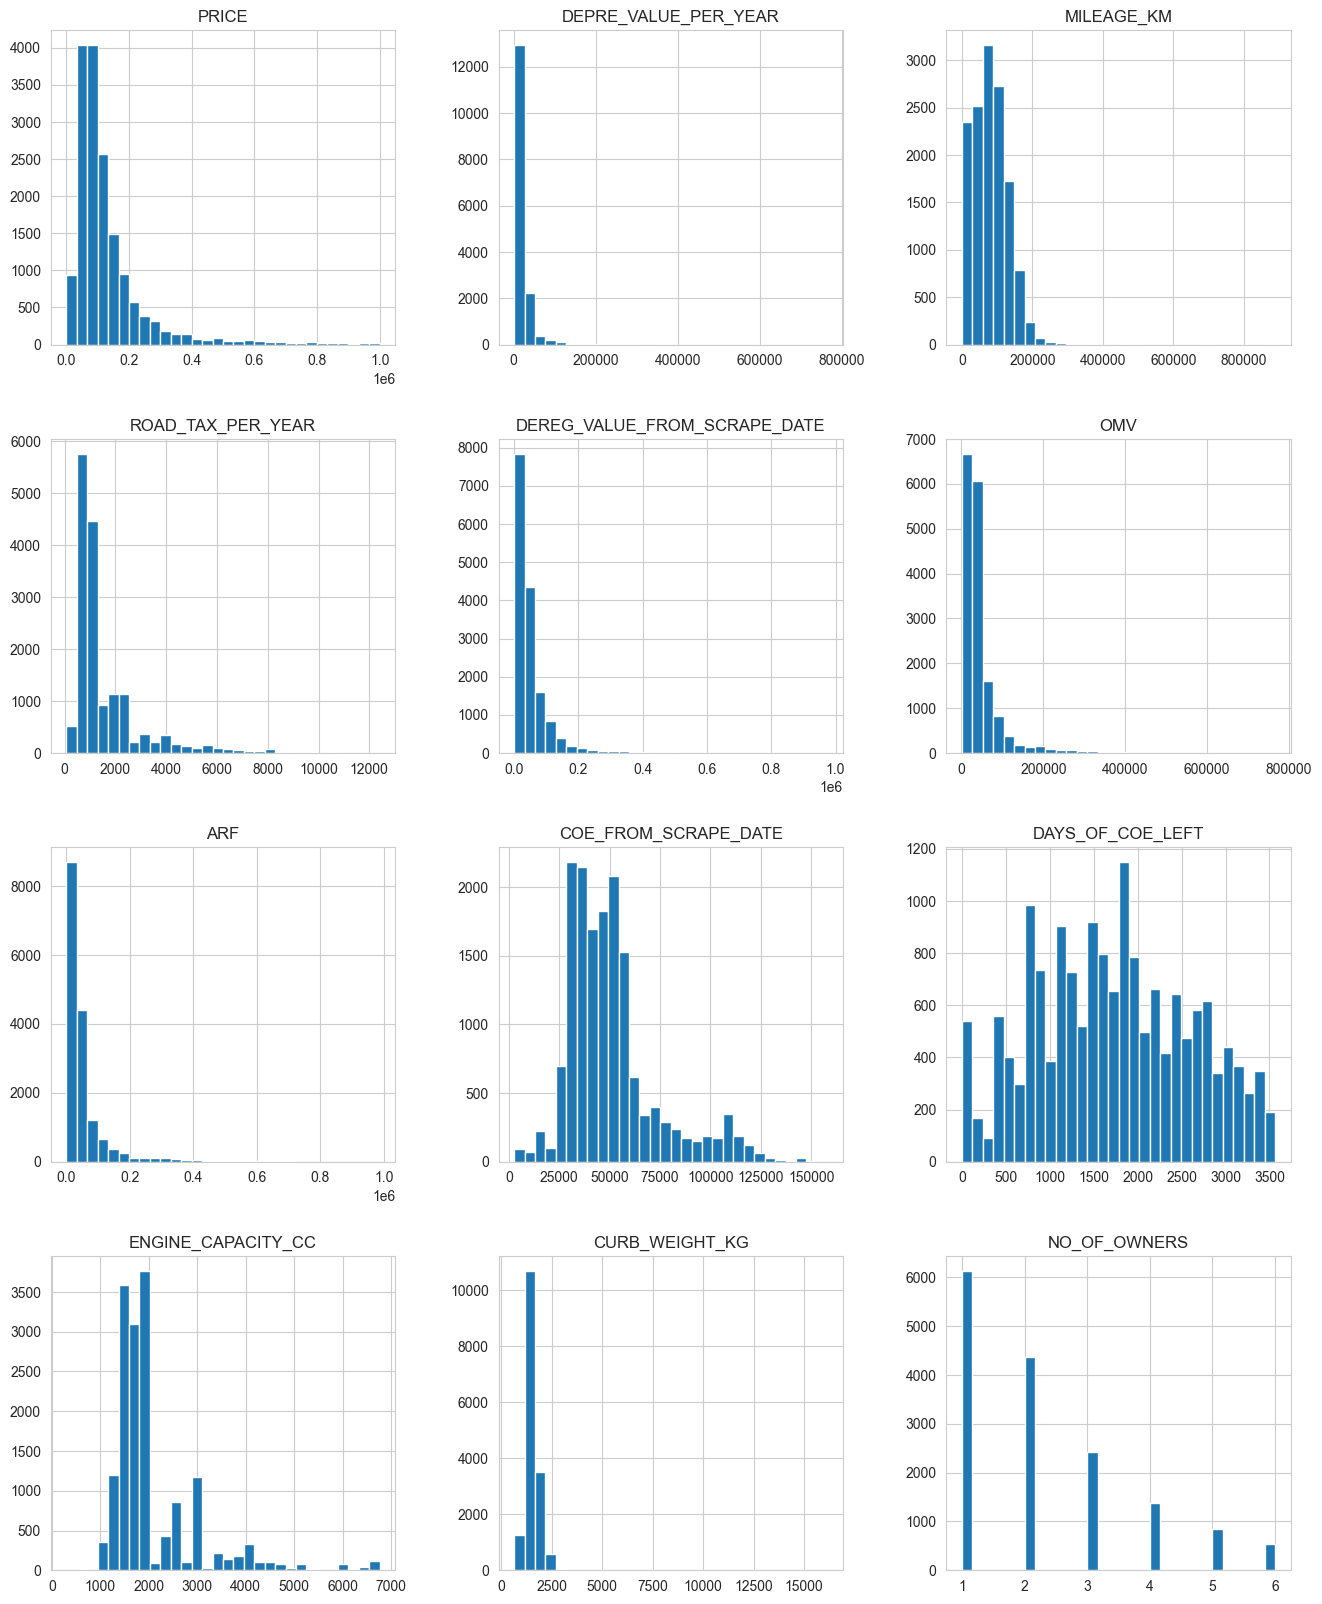

In [7]:
df_num.hist(figsize=(16, 20),bins=30)

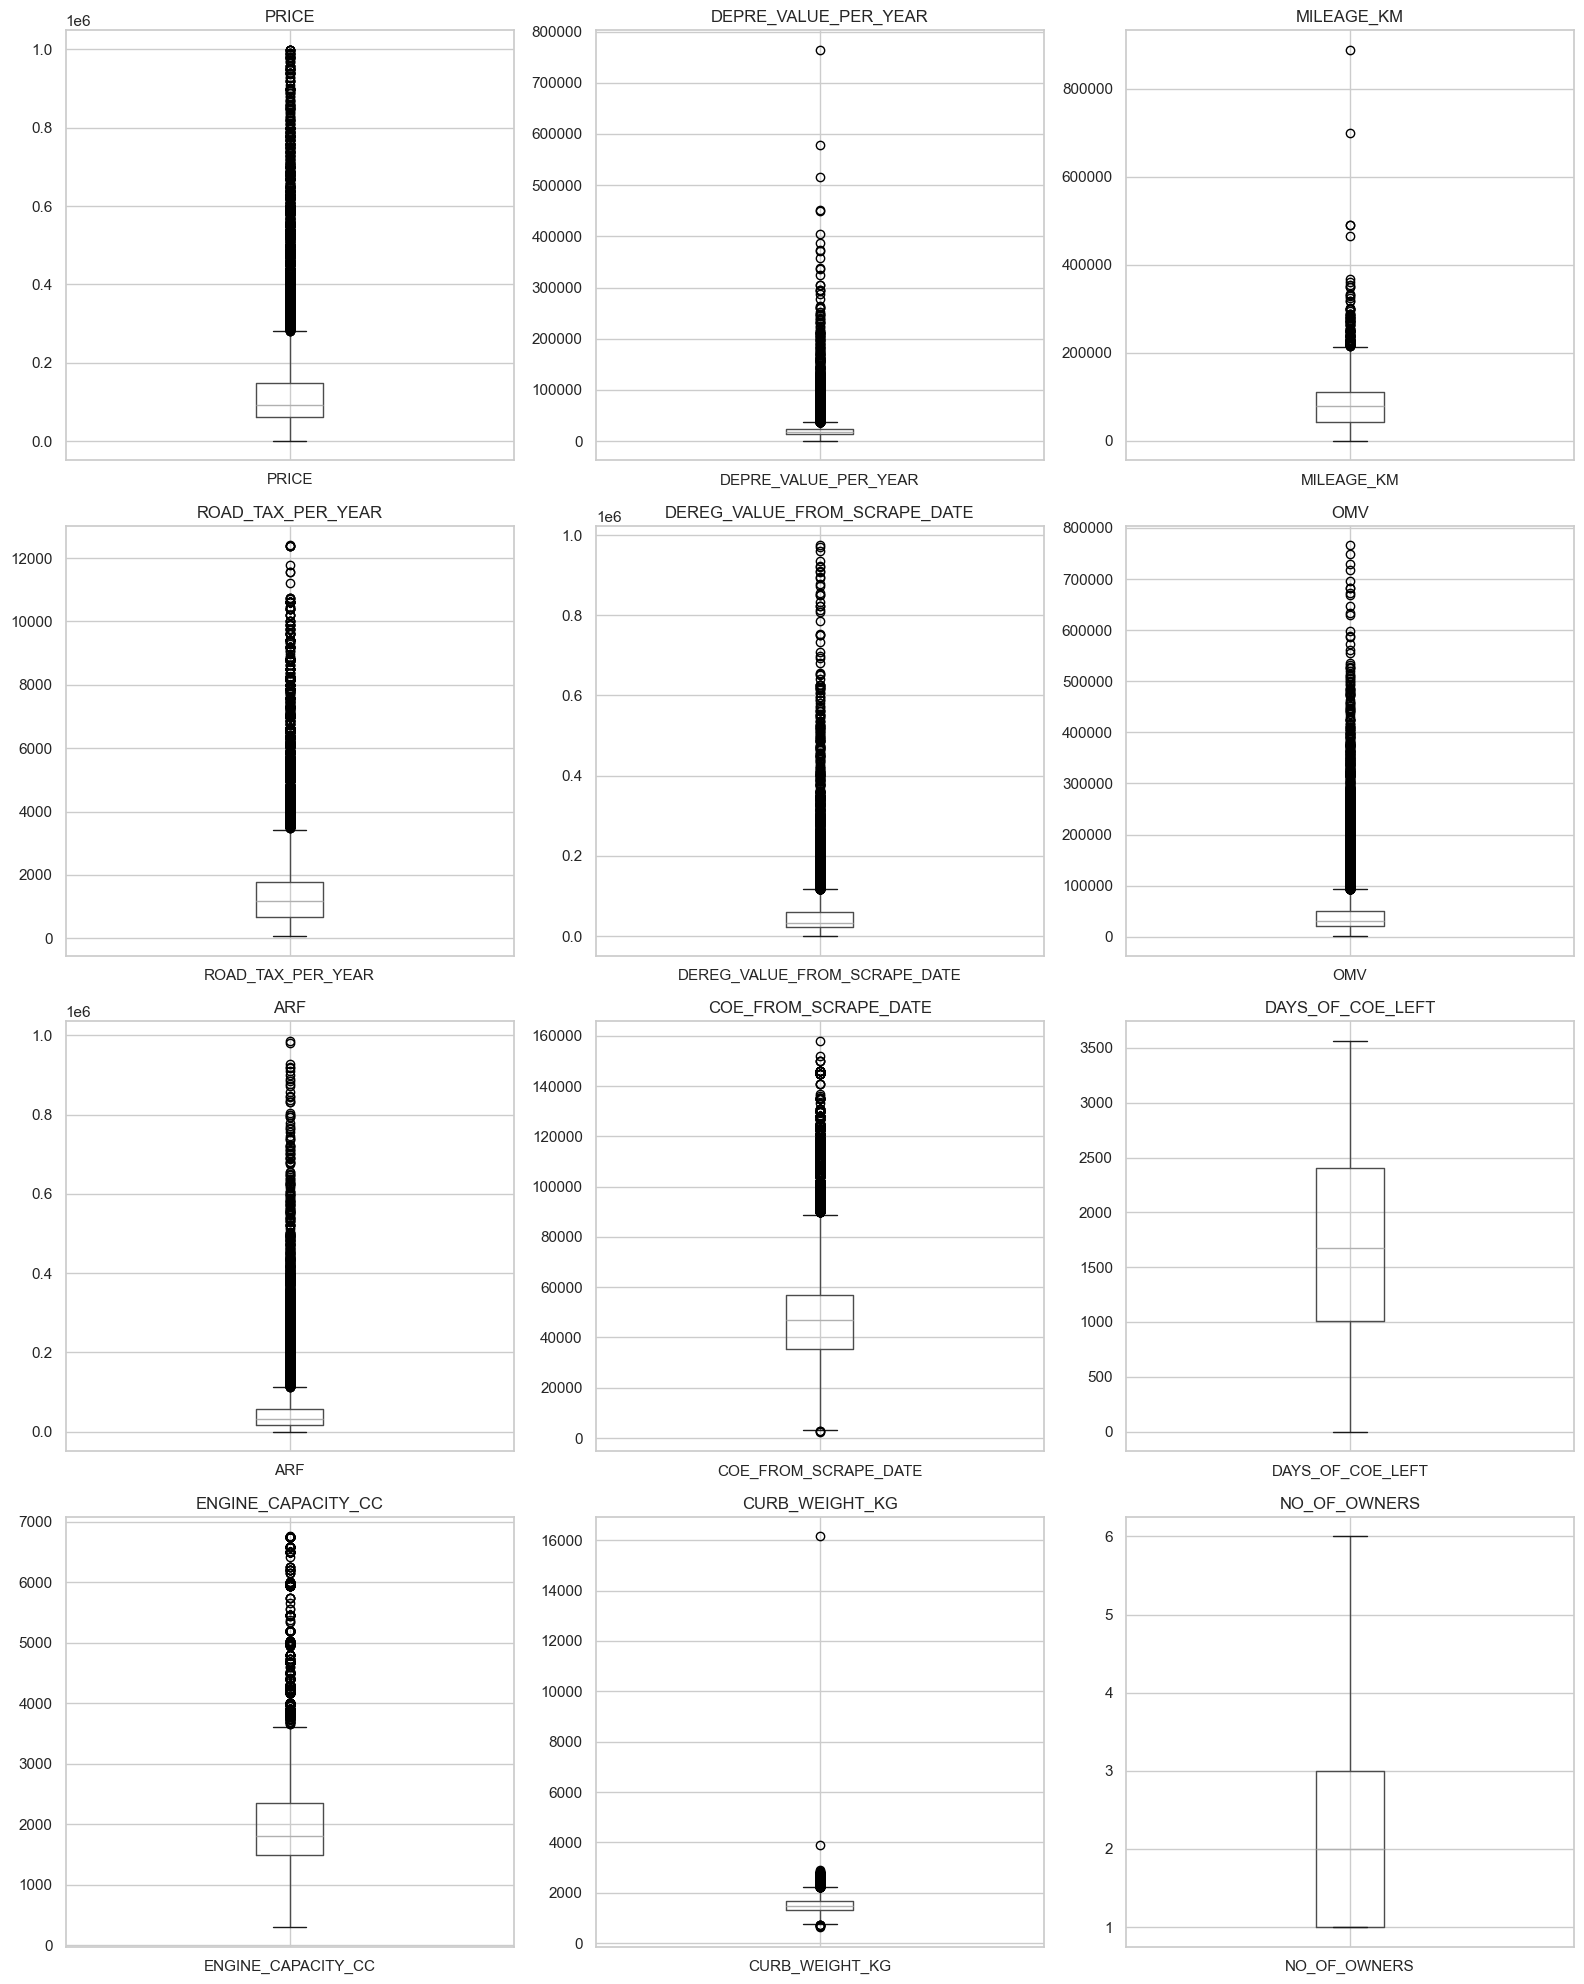

In [12]:
plt.figure(figsize=(16, 20))

for column in df_num.columns:
    plt.subplot(4, 3, df_num.columns.get_loc(column) + 1)  # Adjust subplot layout as needed
    df_num.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

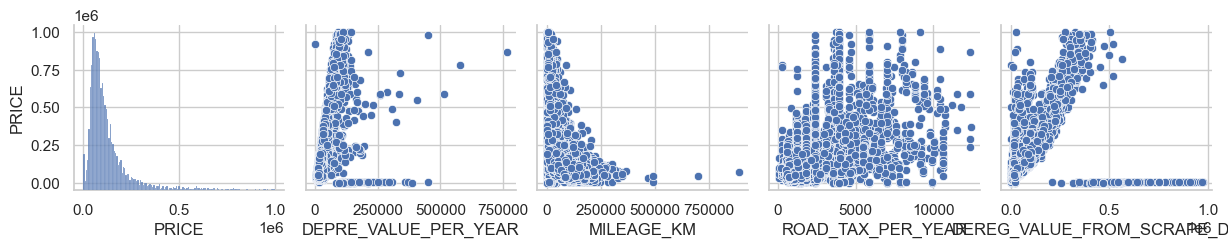

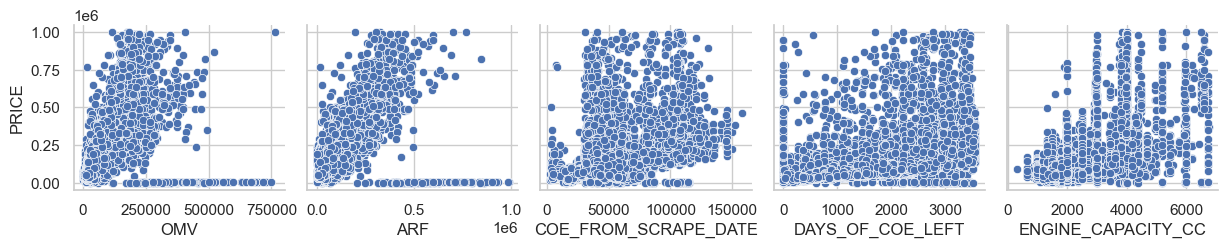

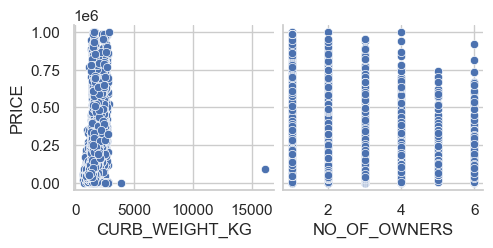

In [13]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['PRICE'])

### Categorical Data Distribution

In [14]:
cat_var=['BRAND',
         'MANUFACTURED_YEAR',
         'TRANSMISSION',
         'VEHICLE_TYPE'
#         'REG_DATE',
#         'POST_DATE'        
]

df_cat=df_clean[cat_var]
df_cat.head()

,BRAND,MANUFACTURED_YEAR,TRANSMISSION,VEHICLE_TYPE
0,Mercedes-Benz,2015.0,Auto,Luxury Sedan
1,Peugeot,2014.0,Auto,NaN
2,Renault,2018.0,Auto,Sports Car
3,Porsche,2017.0,Auto,SUV
4,Toyota,2019.0,Auto,MPV


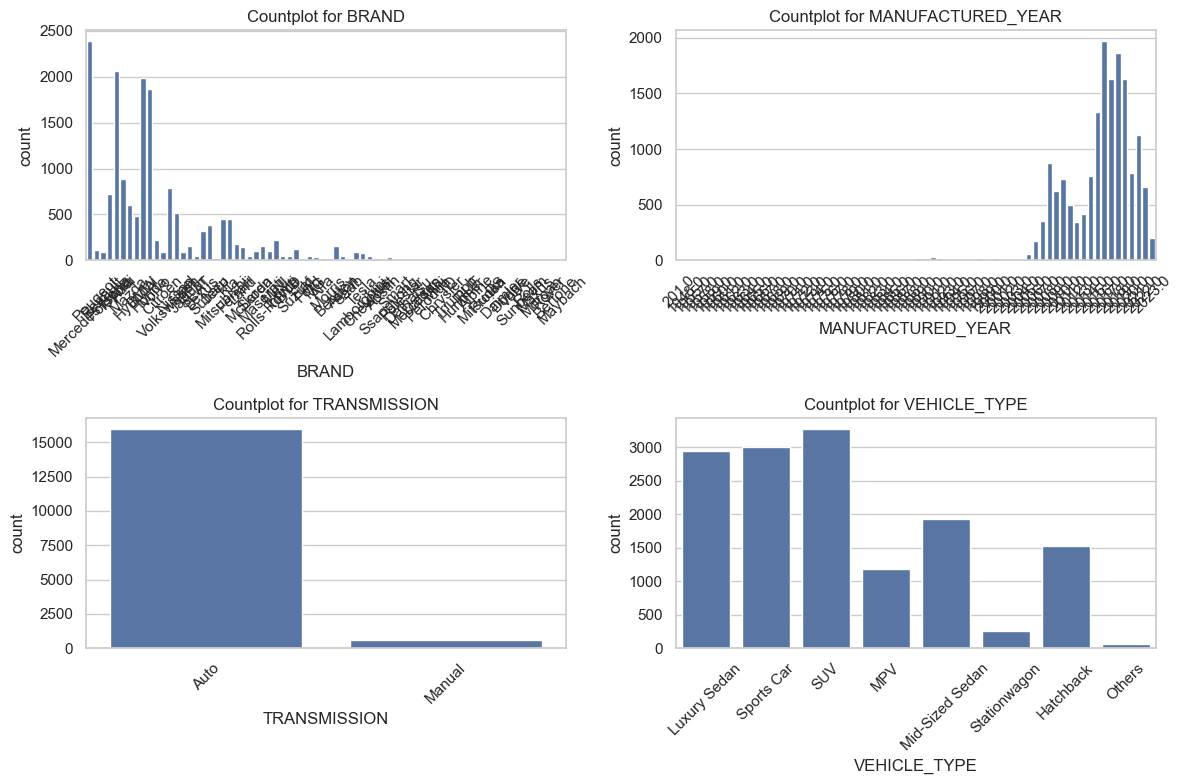

In [15]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")  # Optional: Set the plot style

for i, column in enumerate(df_cat.columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=column, data=df_cat)
    plt.xticks(rotation=45)
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()

In [16]:
# plt.figure(figsize = (12, 6))
# ax = sns.boxplot(x='VEHICLE_TYPE', y='PRICE', data=df_clean)
# plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
# plt.xticks(rotation=45)

# Data Pre-Processing

## Dropping Missing Rows

In [17]:
# Drop rows where price is missing
df_clean = df_clean.dropna(subset=['PRICE'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16432 entries, 0 to 16593
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         16432 non-null  object 
 1   PRICE                         16432 non-null  float64
 2   DEPRE_VALUE_PER_YEAR          15973 non-null  float64
 3   REG_DATE                      16432 non-null  object 
 4   MILEAGE_KM                    13635 non-null  float64
 5   MANUFACTURED_YEAR             16251 non-null  float64
 6   ROAD_TAX_PER_YEAR             16012 non-null  float64
 7   TRANSMISSION                  16432 non-null  object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  15735 non-null  float64
 9   OMV                           16352 non-null  float64
 10  ARF                           16189 non-null  float64
 11  COE_FROM_SCRAPE_DATE          15875 non-null  float64
 12  DAYS_OF_COE_LEFT              16304 non-null  float64
 13  ENGINE

Dropping rows that have missing data with a threshold of 5%. 

In [18]:
rows_w_gt_11_na = df_clean[df_clean.isnull().sum(axis=1) > 1 ].shape[0]
print('Percent of total rows missing more than 1 values: ' + str("{:.1%}".format(rows_w_gt_11_na/df_clean.shape[0])))

Percent of total rows missing more than 1 values: 12.1%


In [19]:
rows_w_gt_11_na = df_clean[df_clean.isnull().sum(axis=1) > 2 ].shape[0]
print('Percent of total rows missing more than 2 values: ' + str("{:.1%}".format(rows_w_gt_11_na/df_clean.shape[0])))

Percent of total rows missing more than 2 values: 3.7%


Given that the percentage of rows with missing data more than 2 values is within the threshold (3.7%), we proceeded to drop the rows with more than 2 missing values.

In [20]:
dropped_data = df_clean.dropna(thresh=df_clean.shape[1]-2)
print("Starting row count: " + str(df_clean.shape[0]))
print("Ending row count: " + str(dropped_data.shape[0]))
print("Percent dropped: " + "{:.2%}".format(1-dropped_data.shape[0]/df_clean.shape[0]))

Starting row count: 16432
Ending row count: 15826
Percent dropped: 3.69%


In [21]:
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15826 entries, 0 to 16593
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BRAND                         15826 non-null  object 
 1   PRICE                         15826 non-null  float64
 2   DEPRE_VALUE_PER_YEAR          15560 non-null  float64
 3   REG_DATE                      15826 non-null  object 
 4   MILEAGE_KM                    13407 non-null  float64
 5   MANUFACTURED_YEAR             15778 non-null  float64
 6   ROAD_TAX_PER_YEAR             15725 non-null  float64
 7   TRANSMISSION                  15826 non-null  object 
 8   DEREG_VALUE_FROM_SCRAPE_DATE  15429 non-null  float64
 9   OMV                           15826 non-null  float64
 10  ARF                           15789 non-null  float64
 11  COE_FROM_SCRAPE_DATE          15502 non-null  float64
 12  DAYS_OF_COE_LEFT              15826 non-null  float64
 13  ENGINE

In [22]:
col_w_na = pd.DataFrame((dropped_data.isnull().sum().sort_values(ascending=False)/dropped_data.shape[0])).applymap("{0:.2%}".format)

print(col_w_na[0])

MILEAGE_KM                      15.28%
VEHICLE_TYPE                    14.57%
NO_OF_OWNERS                     3.81%
DEREG_VALUE_FROM_SCRAPE_DATE     2.51%
COE_FROM_SCRAPE_DATE             2.05%
ENGINE_CAPACITY_CC               1.71%
DEPRE_VALUE_PER_YEAR             1.68%
CURB_WEIGHT_KG                   0.83%
ROAD_TAX_PER_YEAR                0.64%
MANUFACTURED_YEAR                0.30%
ARF                              0.23%
BRAND                            0.00%
OMV                              0.00%
DAYS_OF_COE_LEFT                 0.00%
PRICE                            0.00%
TRANSMISSION                     0.00%
REG_DATE                         0.00%
POST_DATE                        0.00%
Name: 0, dtype: object


C:\Users\Samuel Thong\AppData\Local\Temp\ipykernel_13720\3510873761.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  col_w_na = pd.DataFrame((dropped_data.isnull().sum().sort_values(ascending=False)/dropped_data.shape[0])).applymap("{0:.2%}".format)


## Fill Missing data

In [23]:

# MILEAGE_KM has 15% of rows to be empty. Fill Nan with the min and max values to get a range of prices based on mileage
dropped_data['MILEAGE_KM_MAX']=dropped_data['MILEAGE_KM']
dropped_data['MILEAGE_KM_MAX'].fillna(value=dropped_data['MILEAGE_KM'].max(),inplace=True)

dropped_data['MILEAGE_KM_MIN']=dropped_data['MILEAGE_KM']
dropped_data['MILEAGE_KM_MIN'].fillna(value=dropped_data['MILEAGE_KM'].min(),inplace=True)

dropped_data.drop('MILEAGE_KM', axis=1, inplace=True)

# Fill missing VEHICLE_TYPE with 'Missing' constant
dropped_data['VEHICLE_TYPE'].fillna(value="Missing",inplace=True)

# Fill missing NO_OF_OWNERS, DEREG_VALUE_FROM_SCRAPE_DATE, COE_FROM_SCRAPE_DATE, ENGINE_CAPACITY_CC, 
# DEPRE_VALUE_PER_YEAR, CURB_WEIGHT_KG, ROAD_TAX_PER_YEAR, ARF, DEPRE_VALUE_PER_YEAR with the mean 

dropped_data['ROAD_TAX_PER_YEAR'].fillna(value=dropped_data['ROAD_TAX_PER_YEAR'].mean(),inplace=True)
dropped_data['DEREG_VALUE_FROM_SCRAPE_DATE'].fillna(value=dropped_data['DEREG_VALUE_FROM_SCRAPE_DATE'].mean(),inplace=True)
dropped_data['COE_FROM_SCRAPE_DATE'].fillna(value=dropped_data['COE_FROM_SCRAPE_DATE'].mean(),inplace=True)
dropped_data['DAYS_OF_COE_LEFT'].fillna(value=dropped_data['DAYS_OF_COE_LEFT'].mean(),inplace=True)
dropped_data['ENGINE_CAPACITY_CC'].fillna(value=dropped_data['ENGINE_CAPACITY_CC'].mean(),inplace=True)
dropped_data['CURB_WEIGHT_KG'].fillna(value=dropped_data['CURB_WEIGHT_KG'].mean(),inplace=True)
dropped_data['NO_OF_OWNERS'].fillna(value=dropped_data['NO_OF_OWNERS'].mean(),inplace=True)
dropped_data['ARF'].fillna(value=dropped_data['ARF'].mean(),inplace=True)
dropped_data['DEPRE_VALUE_PER_YEAR'].fillna(value=dropped_data['DEPRE_VALUE_PER_YEAR'].mean(),inplace=True)

# Fill MANUFACTURED_YEAR with the year of the REG_DATE

dropped_data['REG_DATE'] = pd.to_datetime(dropped_data['REG_DATE'])
dropped_data['MANUFACTURED_YEAR'].fillna(value=dropped_data['REG_DATE'].dt.year,inplace=True)

C:\Users\Samuel Thong\AppData\Local\Temp\ipykernel_13720\3510039635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_data['MILEAGE_KM_MAX']=dropped_data['MILEAGE_KM']
C:\Users\Samuel Thong\AppData\Local\Temp\ipykernel_13720\3510039635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_data['MILEAGE_KM_MAX'].fillna(value=dropped_data['MILEAGE_KM'].max(),inplace=True)
C:\Users\Samuel Thong\AppData\Local\Temp\ipykernel_13720\3510039635.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [24]:
dropped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15826 entries, 0 to 16593
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   BRAND                         15826 non-null  object        
 1   PRICE                         15826 non-null  float64       
 2   DEPRE_VALUE_PER_YEAR          15826 non-null  float64       
 3   REG_DATE                      15826 non-null  datetime64[ns]
 4   MANUFACTURED_YEAR             15826 non-null  float64       
 5   ROAD_TAX_PER_YEAR             15826 non-null  float64       
 6   TRANSMISSION                  15826 non-null  object        
 7   DEREG_VALUE_FROM_SCRAPE_DATE  15826 non-null  float64       
 8   OMV                           15826 non-null  float64       
 9   ARF                           15826 non-null  float64       
 10  COE_FROM_SCRAPE_DATE          15826 non-null  float64       
 11  DAYS_OF_COE_LEFT              158

## Feature Extraction: Add CAR_AGE Column

In [25]:
df_clean=dropped_data
df_main['SCRAPE_DATE'] = pd.to_datetime(df_main['SCRAPE_DATE'])
df_clean['MANUFACTURED_YEAR'] = df_clean['MANUFACTURED_YEAR'].astype(int)
df_clean['CAR_AGE'] = df_main['SCRAPE_DATE'].dt.year  - df_clean['MANUFACTURED_YEAR'] # Obtaining values for age of car
df_clean['CAR_AGE'].astype(int)

C:\Users\Samuel Thong\AppData\Local\Temp\ipykernel_13720\3768474546.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_main['SCRAPE_DATE'] = pd.to_datetime(df_main['SCRAPE_DATE'])


0         9
1        10
2         6
3         7
4         5
         ..
16589    13
16590     1
16591     9
16592    16
16593    17
Name: CAR_AGE, Length: 15826, dtype: int32

## Feature Extraction: Add POST_AGE Column

In [26]:
df_clean['POST_DATE'] = pd.to_datetime(df_clean['POST_DATE'])
df_clean['POST_AGE'] = (df_main['SCRAPE_DATE'] - df_clean['POST_DATE'])
df_clean['POST_AGE']=df_clean['POST_AGE'].dt.days

In [27]:
df_clean.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,TRANSMISSION,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,...,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,POST_DATE,MILEAGE_KM_MAX,MILEAGE_KM_MIN,CAR_AGE,POST_AGE
0,Mercedes-Benz,80800.0,22520.0,2016-02-29,2015,1202.0,Auto,51892.0,52959.0,67327.0,...,762.0,1991.0,1680.0,2.0,Luxury Sedan,2024-01-06,121000.0,121000.0,9.0,20
1,Peugeot,18000.0,15330.0,2014-11-13,2014,1144.0,Auto,10880.0,24683.0,11557.0,...,277.0,1560.0,1520.0,2.0,Missing,2023-12-11,888880.0,1.0,10.0,46
2,Renault,130800.0,20890.0,2019-06-28,2018,976.0,Auto,45808.0,30800.0,35120.0,...,1976.0,1798.0,1430.0,2.0,Sports Car,2023-11-22,29000.0,29000.0,6.0,65
3,Porsche,196800.0,39190.0,2017-12-28,2017,1194.0,Auto,77147.0,63495.0,86291.0,...,1126.0,1984.0,1845.0,3.0,SUV,2023-12-12,888880.0,1.0,7.0,45
4,Toyota,222800.0,29500.0,2020-11-12,2019,1792.0,Auto,60821.0,37576.0,44607.0,...,2466.0,2493.0,1920.0,2.0,MPV,2024-01-13,30500.0,30500.0,5.0,13


## Feature Engineering: One-Hot Encoding of TRANSMISSION Column

In [28]:
# Transmission conversion -> 1 for auto, 0 for manual (just 1 column only)

df_clean['TRANSMISSION_CONVERT'] = df_clean['TRANSMISSION'].apply(lambda x: 1 if x == 'Auto' else 0)
df_clean.drop('TRANSMISSION',axis=1,inplace=True)
df_clean.rename(columns={'TRANSMISSION_CONVERT':"TRANSMISSION"}, inplace=True)  # Renaming column back
df_clean.sample(5)

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,...,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,VEHICLE_TYPE,POST_DATE,MILEAGE_KM_MAX,MILEAGE_KM_MIN,CAR_AGE,POST_AGE,TRANSMISSION
15463,Mercedes-Benz,170800.0,23040.0,2020-01-08,2018,684.0,74168.0,53022.0,67440.0,40889.0,...,1497.0,1505.0,1.000000,Missing,2024-01-11,69092.0,69092.0,6.0,16,1
8082,SEAT,97800.0,16170.0,2019-03-15,2018,624.0,41116.0,26799.0,29519.0,36961.0,...,1395.0,1375.0,1.000000,SUV,2024-01-05,888880.0,1.0,6.0,21,1
9304,BMW,43800.0,18470.0,2015-08-28,2015,684.0,25802.0,29993.0,28991.0,62140.0,...,1499.0,1425.0,2.000000,Luxury Sedan,2023-12-31,104000.0,104000.0,9.0,26,1
14455,Toyota,131800.0,21780.0,2019-07-04,2018,974.0,40219.0,32027.0,26838.0,36961.0,...,1797.0,1620.0,1.000000,Missing,2024-01-19,65000.0,65000.0,6.0,8,1
13937,Porsche,152800.0,25460.0,2010-01-26,2009,4295.0,23678.0,101612.0,101612.0,39463.0,...,3436.0,1450.0,2.234645,Sports Car,2023-12-09,888880.0,1.0,15.0,49,1


## Feature Engineering: One-Hot Encoding of VEHICLE_TYPE Column


In [87]:
veh_list=[]
for veh in df_clean['VEHICLE_TYPE'].unique():
    veh_list.append(veh)

veh_list.sort()
out = map(lambda x:x.lower(), veh_list)
veh_list = list(out) 
print(veh_list)

['hatchback', 'luxury sedan', 'mpv', 'mid-sized sedan', 'missing', 'others', 'suv', 'sports car', 'stationwagon']


In [29]:
df_clean['VEHICLE_TYPE']
df_encoded = pd.get_dummies(df_clean['VEHICLE_TYPE'], prefix='VEHICLE_TYPE')

# Concatenating the new columns to the original DataFrame
df_encoded = df_encoded.astype(int)
df_clean = pd.concat([df_clean, df_encoded], axis=1)
df_clean.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,...,TRANSMISSION,VEHICLE_TYPE_Hatchback,VEHICLE_TYPE_Luxury Sedan,VEHICLE_TYPE_MPV,VEHICLE_TYPE_Mid-Sized Sedan,VEHICLE_TYPE_Missing,VEHICLE_TYPE_Others,VEHICLE_TYPE_SUV,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Stationwagon
0,Mercedes-Benz,80800.0,22520.0,2016-02-29,2015,1202.0,51892.0,52959.0,67327.0,54920.0,...,1,0,1,0,0,0,0,0,0,0
1,Peugeot,18000.0,15330.0,2014-11-13,2014,1144.0,10880.0,24683.0,11557.0,63990.0,...,1,0,0,0,0,1,0,0,0,0
2,Renault,130800.0,20890.0,2019-06-28,2018,976.0,45808.0,30800.0,35120.0,35906.0,...,1,0,0,0,0,0,0,0,1,0
3,Porsche,196800.0,39190.0,2017-12-28,2017,1194.0,77147.0,63495.0,86291.0,53711.0,...,1,0,0,0,0,0,0,1,0,0
4,Toyota,222800.0,29500.0,2020-11-12,2019,1792.0,60821.0,37576.0,44607.0,40301.0,...,1,0,0,1,0,0,0,0,0,0


## Feature Engineering: Categorization of BRAND Column


In [30]:
# Renaming Brand Names to their actual names
df_clean2=df_clean
df_clean2.loc[df_clean2['BRAND'] == 'Aston','BRAND'] = 'Aston Martin'
df_clean2.loc[df_clean2['BRAND'] == 'Land','BRAND'] = 'Land Rover'
df_clean2.loc[df_clean2['BRAND'] == 'Alfa', 'BRAND'] = 'Alfa Romeo'
# Cleaning whitespaces from the values in "Brand" to prevent any messup later
df_clean2['BRAND'].apply(str.strip)
pd.set_option("display.max_rows", None)
print("\nValue Counts of Brands:\n", df_clean2.loc[:,'BRAND'].value_counts())
print("\n# of Brands:", len(df_clean2.loc[:,'BRAND'].value_counts()))


Value Counts of Brands:
 BRAND
Mercedes-Benz    2224
Toyota           1980
BMW              1907
Honda            1795
Audi              849
Volkswagen        754
Porsche           663
Mazda             580
Nissan            500
Hyundai           468
Kia               445
Mitsubishi        433
Subaru            372
Lexus             300
Volvo             219
MINI              215
Ferrari           168
Maserati          151
Land Rover        147
Jaguar            147
Bentley           144
Suzuki            119
Peugeot           107
Skoda             105
Lamborghini        92
Citroen            91
Opel               89
Rolls-Royce        87
Renault            87
Tesla              73
SEAT               51
Ford               50
Aston Martin       48
McLaren            47
Chevrolet          47
Infiniti           45
Ssangyong          36
BYD                26
MG                 25
Jeep               23
Alfa Romeo         21
Lotus              14
Polestar            9
Mercedes            8


In [31]:
category_brands = {
    'EXOTIC': ['Koenigsegg','Bugatti','Ferrari', 'Lamborghini','Aston Martin','McLaren','Hummer'],
    'ULTRA_LUXURY': ['Porsche','Maserati','Rolls-Royce', 'Land Rover','Bentley','Maybach'],
    'LUXURY': ['MINI','Mini','Alfa Romeo','Mercedes','Mercedes-Benz', 'BMW', 'Audi', 'Lexus','Jeep','Lotus','Volvo','Peugeot','Tesla','BYD','Acura','Cadillac','Jaguar','Infiniti','Chrysler','Lincoln','Genesis'],
    'MID_LEVEL': ['Volkswagen','Renault','Ford', 'Chevrolet'],
    'ECONOMY': ['Toyota','Honda','Hyundai', 'Kia', 'Nissan', 'Mazda','Mitsubishi','Subaru','Suzuki','Citroen','Proton','Ssangyong','Daihatsu','Fiat','Skoda','Opel','MG','SEAT','Perodua'],
    'OTHERS': []  # An empty list for unspecified brands
}

# Reversing the categorization based on the 'Brand' column
df_clean2['CAR_CATEGORY'] = df_clean2['BRAND'].apply(lambda x: next((category for category, brands in category_brands.items() if x in brands), 'OTHERS'))

# Displaying the DataFrame with the new 'Category' column
print(df_clean2[['BRAND', 'CAR_CATEGORY']])

               BRAND  CAR_CATEGORY
0      Mercedes-Benz        LUXURY
1            Peugeot        LUXURY
2            Renault     MID_LEVEL
3            Porsche  ULTRA_LUXURY
4             Toyota       ECONOMY
5               Audi        LUXURY
6               Audi        LUXURY
7              Mazda       ECONOMY
8               Audi        LUXURY
9      Mercedes-Benz        LUXURY
10     Mercedes-Benz        LUXURY
11            Toyota       ECONOMY
12           Hyundai       ECONOMY
13               BMW        LUXURY
14             Honda       ECONOMY
15     Mercedes-Benz        LUXURY
16             Mazda       ECONOMY
17             Volvo        LUXURY
18           Citroen       ECONOMY
19     Mercedes-Benz        LUXURY
20     Mercedes-Benz        LUXURY
21           Porsche  ULTRA_LUXURY
22     Mercedes-Benz        LUXURY
23        Volkswagen     MID_LEVEL
24           Hyundai       ECONOMY
25            Nissan       ECONOMY
26            Toyota       ECONOMY
27           Renault

In [32]:
df_encoded = pd.get_dummies(df_clean2['CAR_CATEGORY'], prefix='CAR_CATEGORY')

# Concatenating the new columns to the original DataFrame
df_encoded = df_encoded.astype(int)
df_clean2 = pd.concat([df_clean2, df_encoded], axis=1)
df_clean2.head()

,BRAND,PRICE,DEPRE_VALUE_PER_YEAR,REG_DATE,MANUFACTURED_YEAR,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,...,VEHICLE_TYPE_SUV,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Stationwagon,CAR_CATEGORY,CAR_CATEGORY_ECONOMY,CAR_CATEGORY_EXOTIC,CAR_CATEGORY_LUXURY,CAR_CATEGORY_MID_LEVEL,CAR_CATEGORY_OTHERS,CAR_CATEGORY_ULTRA_LUXURY
0,Mercedes-Benz,80800.0,22520.0,2016-02-29,2015,1202.0,51892.0,52959.0,67327.0,54920.0,...,0,0,0,LUXURY,0,0,1,0,0,0
1,Peugeot,18000.0,15330.0,2014-11-13,2014,1144.0,10880.0,24683.0,11557.0,63990.0,...,0,0,0,LUXURY,0,0,1,0,0,0
2,Renault,130800.0,20890.0,2019-06-28,2018,976.0,45808.0,30800.0,35120.0,35906.0,...,0,1,0,MID_LEVEL,0,0,0,1,0,0
3,Porsche,196800.0,39190.0,2017-12-28,2017,1194.0,77147.0,63495.0,86291.0,53711.0,...,1,0,0,ULTRA_LUXURY,0,0,0,0,0,1
4,Toyota,222800.0,29500.0,2020-11-12,2019,1792.0,60821.0,37576.0,44607.0,40301.0,...,0,0,0,ECONOMY,1,0,0,0,0,0


# Data Visualizations

### Numerical Data Distribution

In [33]:
num_var=['PRICE',
         'DEPRE_VALUE_PER_YEAR',
         'MILEAGE_KM_MAX',
         'MILEAGE_KM_MIN',
         'ROAD_TAX_PER_YEAR',
         'DEREG_VALUE_FROM_SCRAPE_DATE',
         'OMV',
         'ARF',
         'COE_FROM_SCRAPE_DATE',
         'DAYS_OF_COE_LEFT',
         'ENGINE_CAPACITY_CC',
         'CURB_WEIGHT_KG',
         'NO_OF_OWNERS',
         'CAR_AGE',
         'POST_AGE'
        ]

df_num=df_clean2[num_var]
df_num.head()

,PRICE,DEPRE_VALUE_PER_YEAR,MILEAGE_KM_MAX,MILEAGE_KM_MIN,ROAD_TAX_PER_YEAR,DEREG_VALUE_FROM_SCRAPE_DATE,OMV,ARF,COE_FROM_SCRAPE_DATE,DAYS_OF_COE_LEFT,ENGINE_CAPACITY_CC,CURB_WEIGHT_KG,NO_OF_OWNERS,CAR_AGE,POST_AGE
0,80800.0,22520.0,121000.0,121000.0,1202.0,51892.0,52959.0,67327.0,54920.0,762.0,1991.0,1680.0,2.0,9.0,20
1,18000.0,15330.0,888880.0,1.0,1144.0,10880.0,24683.0,11557.0,63990.0,277.0,1560.0,1520.0,2.0,10.0,46
2,130800.0,20890.0,29000.0,29000.0,976.0,45808.0,30800.0,35120.0,35906.0,1976.0,1798.0,1430.0,2.0,6.0,65
3,196800.0,39190.0,888880.0,1.0,1194.0,77147.0,63495.0,86291.0,53711.0,1126.0,1984.0,1845.0,3.0,7.0,45
4,222800.0,29500.0,30500.0,30500.0,1792.0,60821.0,37576.0,44607.0,40301.0,2466.0,2493.0,1920.0,2.0,5.0,13


array([[<Axes: title={'center': 'PRICE'}>,
        <Axes: title={'center': 'DEPRE_VALUE_PER_YEAR'}>,
        <Axes: title={'center': 'MILEAGE_KM_MAX'}>,
        <Axes: title={'center': 'MILEAGE_KM_MIN'}>],
       [<Axes: title={'center': 'ROAD_TAX_PER_YEAR'}>,
        <Axes: title={'center': 'DEREG_VALUE_FROM_SCRAPE_DATE'}>,
        <Axes: title={'center': 'OMV'}>, <Axes: title={'center': 'ARF'}>],
       [<Axes: title={'center': 'COE_FROM_SCRAPE_DATE'}>,
        <Axes: title={'center': 'DAYS_OF_COE_LEFT'}>,
        <Axes: title={'center': 'ENGINE_CAPACITY_CC'}>,
        <Axes: title={'center': 'CURB_WEIGHT_KG'}>],
       [<Axes: title={'center': 'NO_OF_OWNERS'}>,
        <Axes: title={'center': 'CAR_AGE'}>,
        <Axes: title={'center': 'POST_AGE'}>, <Axes: >]], dtype=object)

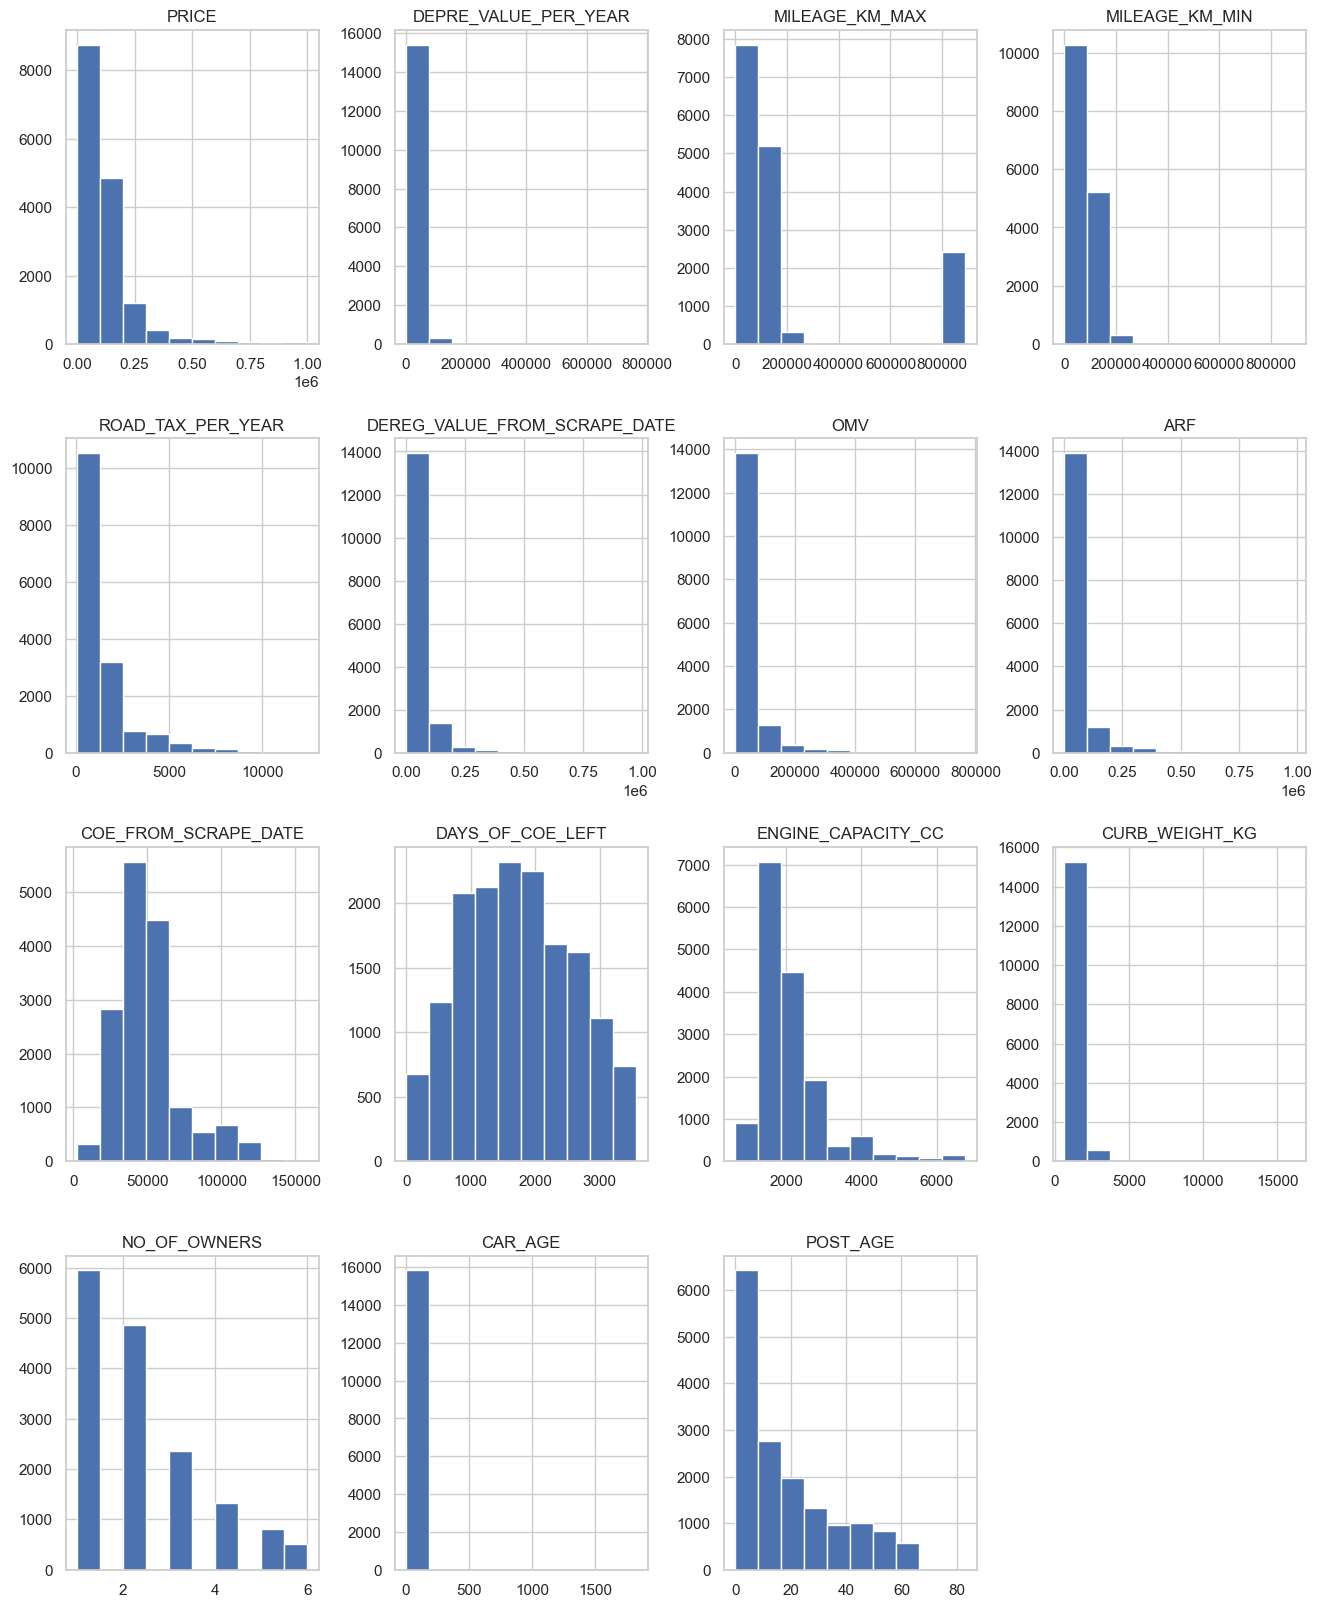

In [34]:
df_num.hist(figsize=(16, 20))

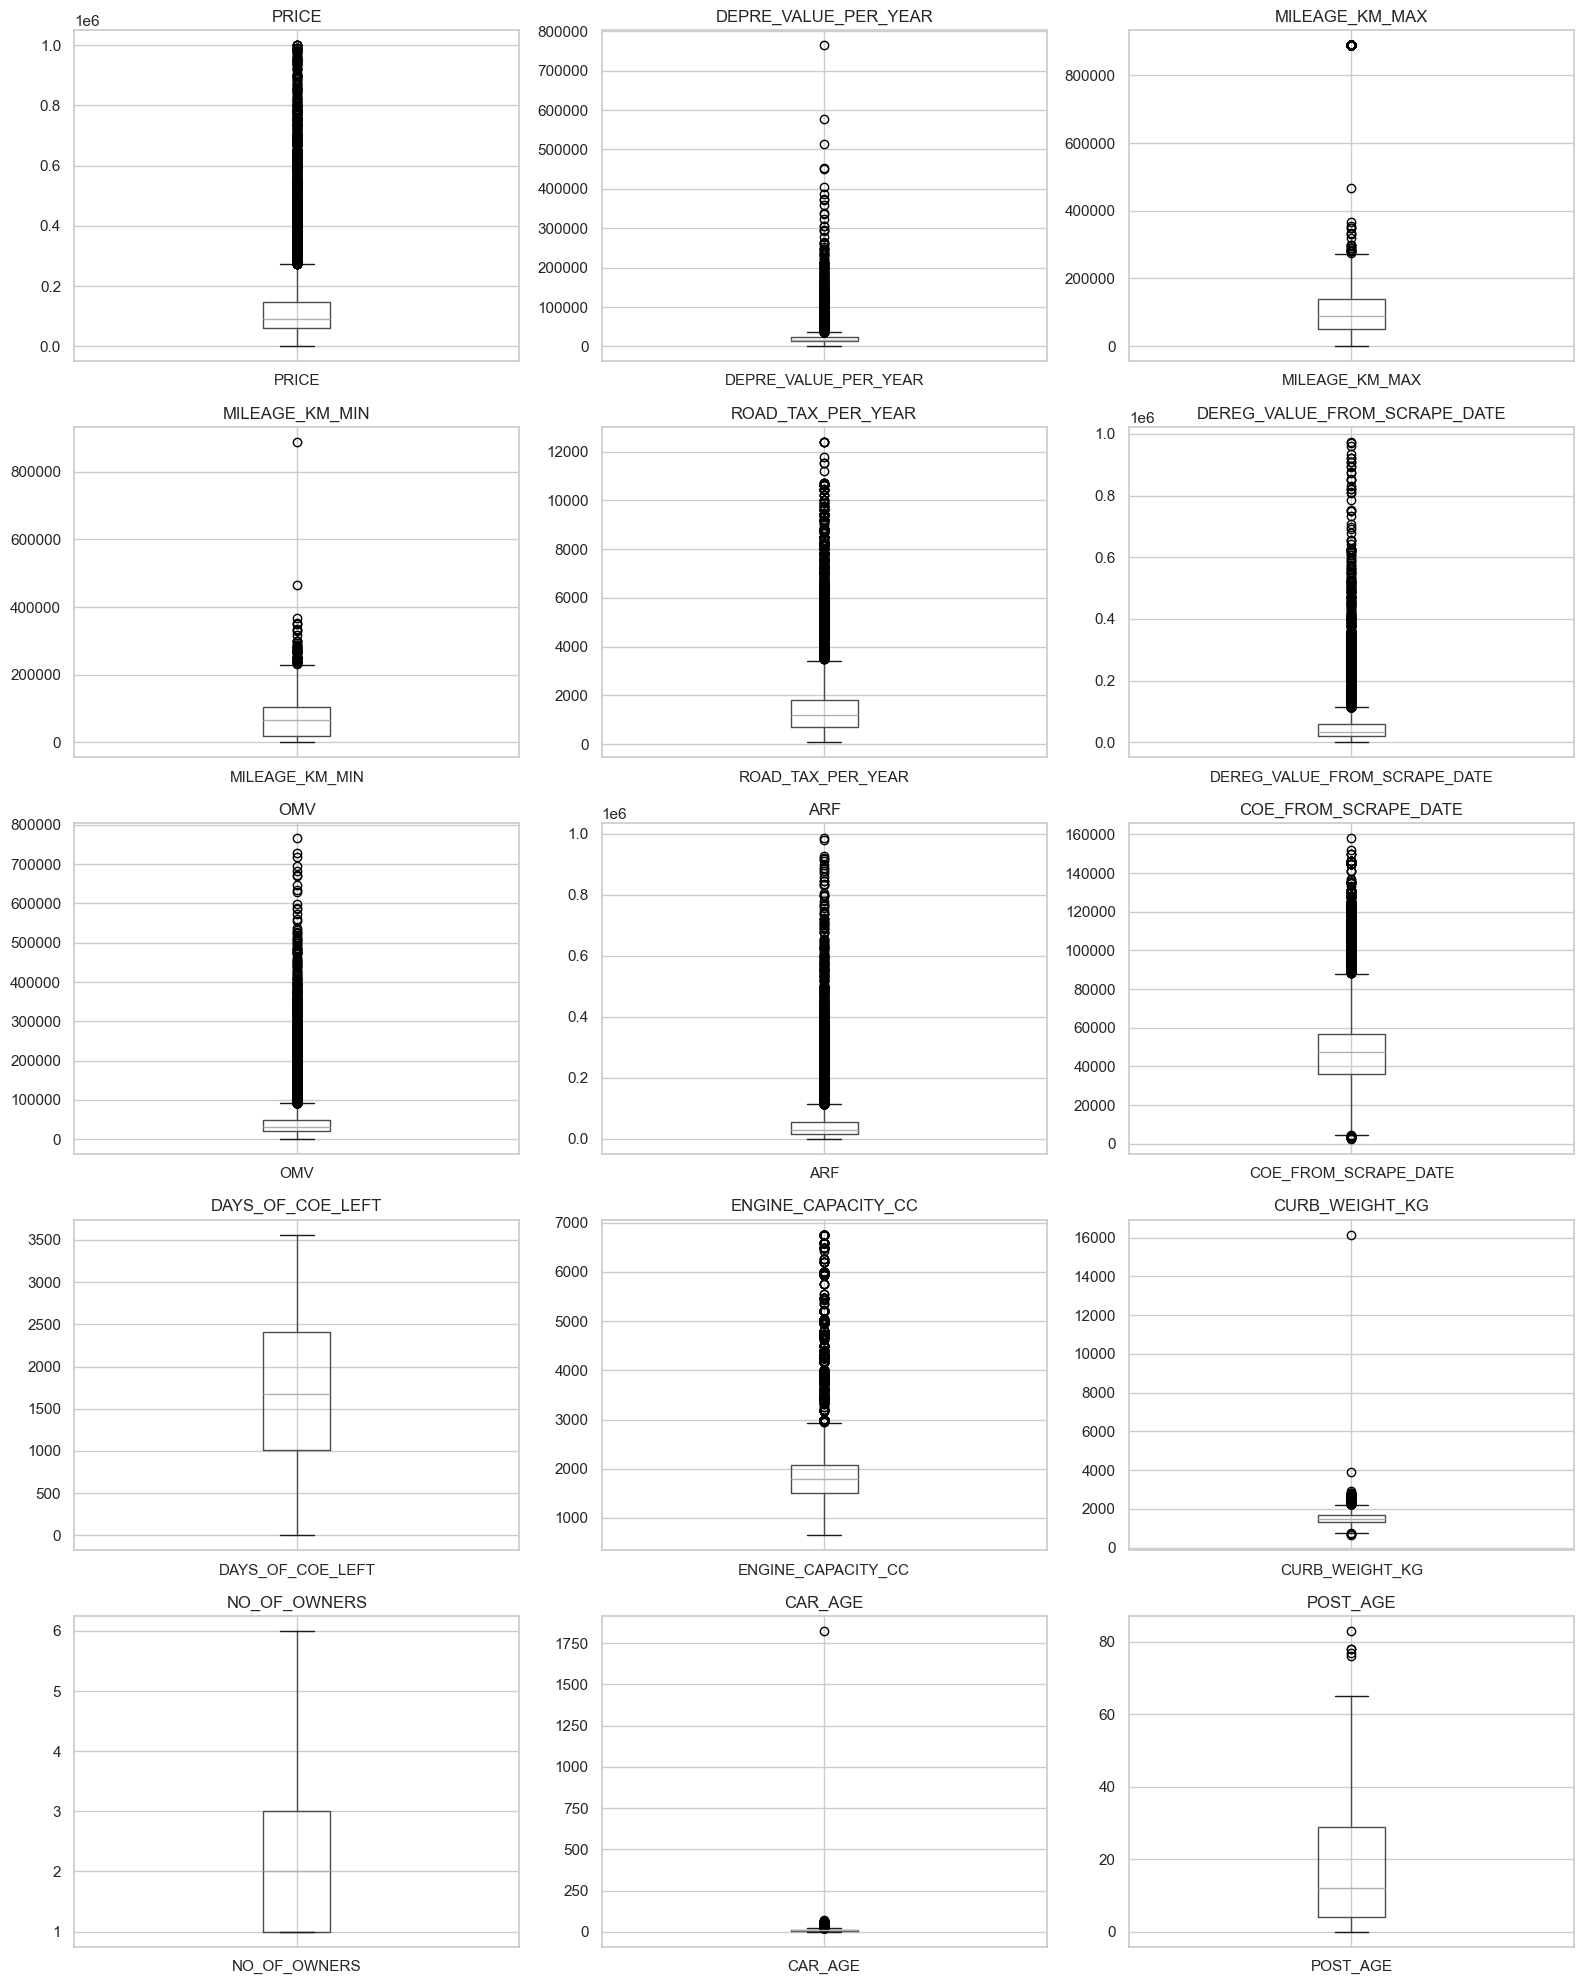

In [35]:
plt.figure(figsize=(16, 20))

for column in df_num.columns:
    plt.subplot(5, 3, df_num.columns.get_loc(column) + 1)  # Adjust subplot layout as needed
    df_num.boxplot(column=column)
    plt.title(column)

plt.tight_layout()
plt.show()

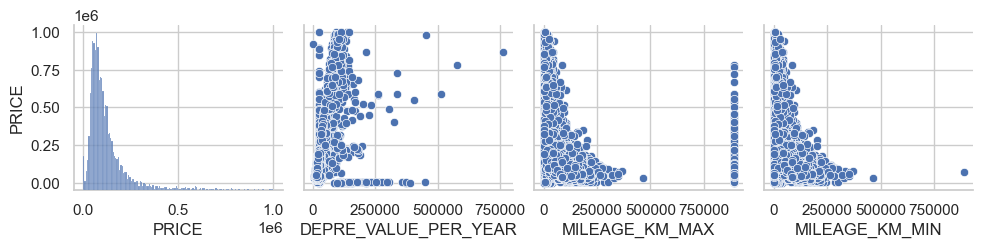

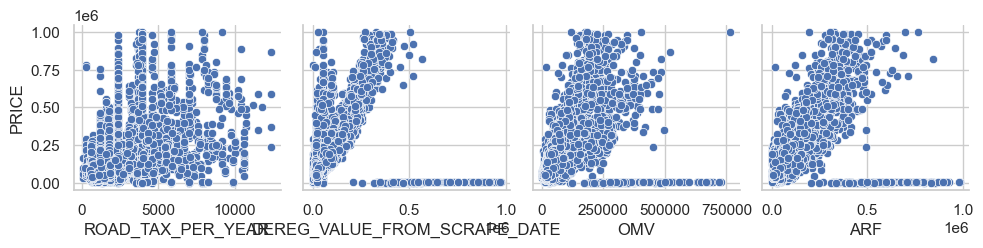

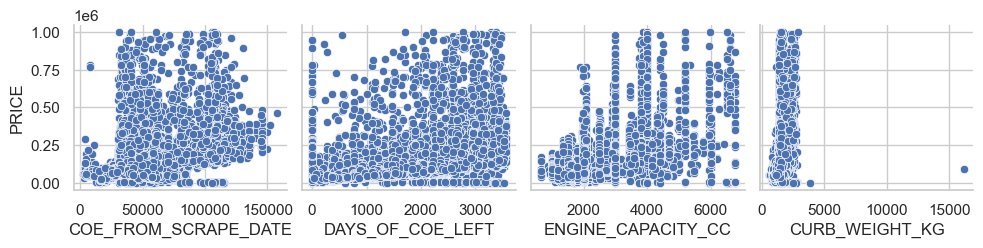

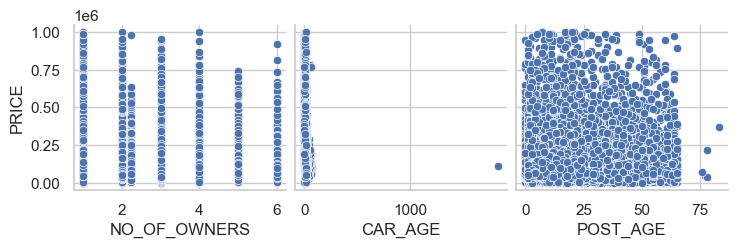

In [36]:
for i in range(0, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['PRICE'])

<Axes: >

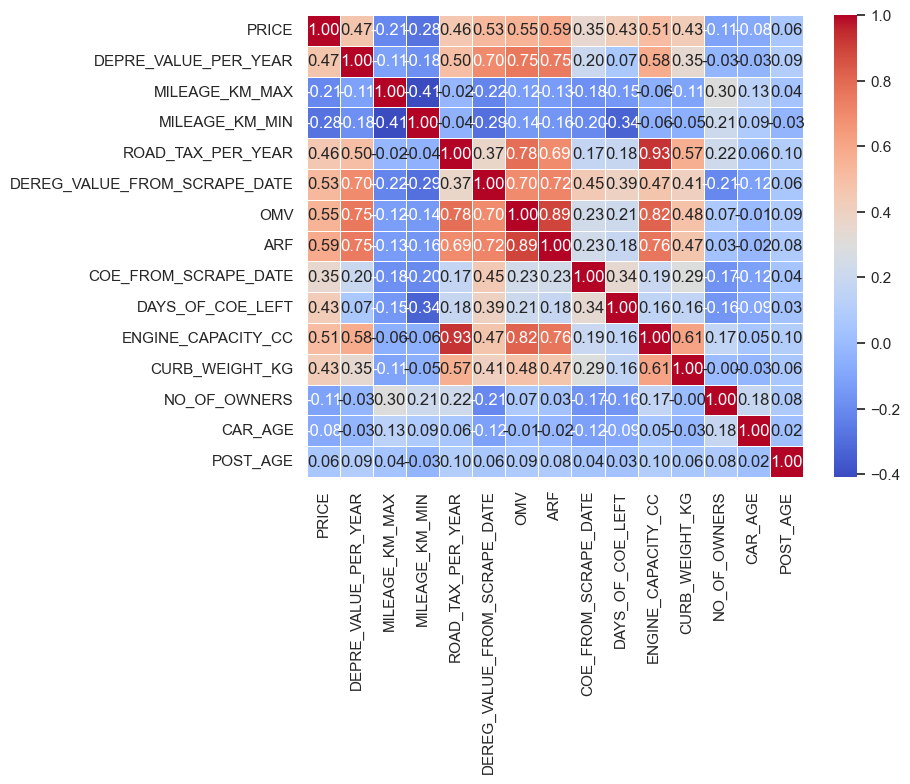

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

### Categorical Data Distribution

In [38]:
cat_var=['CAR_CATEGORY',
         'MANUFACTURED_YEAR',
         'TRANSMISSION',
         'VEHICLE_TYPE'
#         'REG_DATE',
#         'POST_DATE'        
]

df_cat=df_clean[cat_var]
df_cat.head()

,CAR_CATEGORY,MANUFACTURED_YEAR,TRANSMISSION,VEHICLE_TYPE
0,LUXURY,2015,1,Luxury Sedan
1,LUXURY,2014,1,Missing
2,MID_LEVEL,2018,1,Sports Car
3,ULTRA_LUXURY,2017,1,SUV
4,ECONOMY,2019,1,MPV


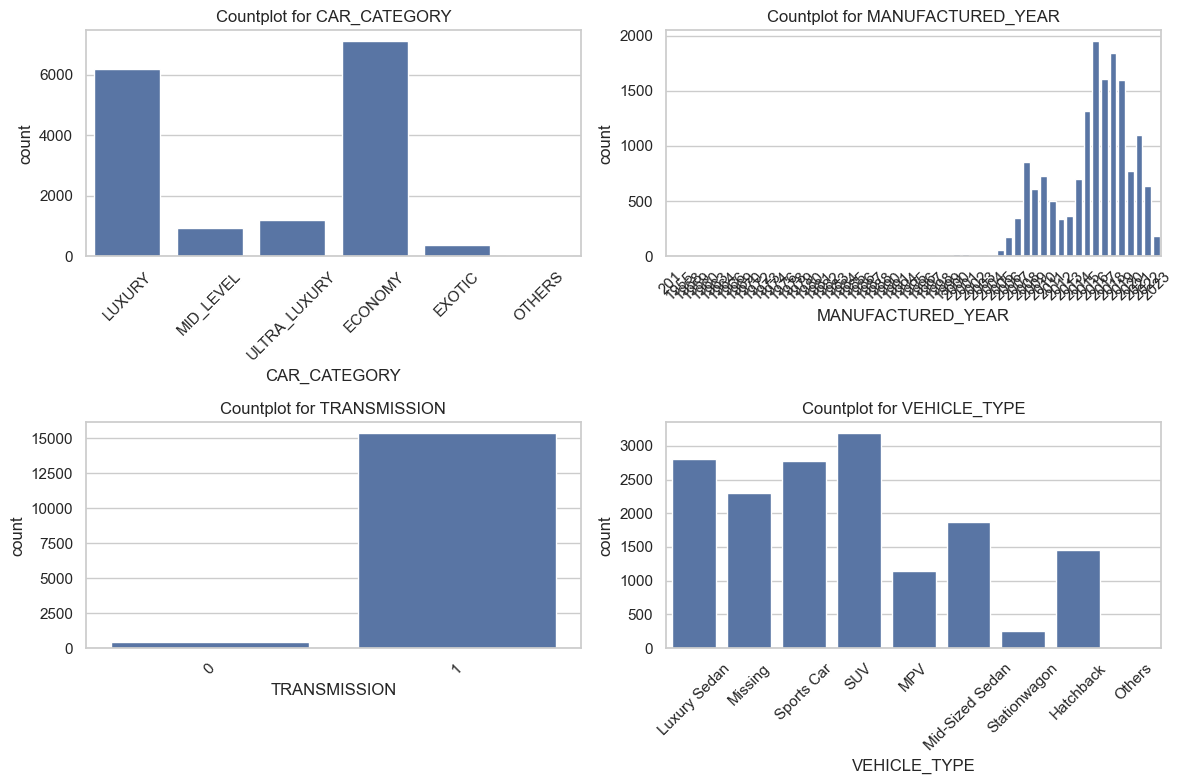

In [39]:
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")  # Optional: Set the plot style

for i, column in enumerate(df_cat.columns):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=column, data=df_cat)
    plt.xticks(rotation=45)
    plt.title(f'Countplot for {column}')

plt.tight_layout()
plt.show()

In [40]:
# plt.figure(figsize = (12, 6))
# ax = sns.boxplot(x='VEHICLE_TYPE', y='PRICE', data=df_clean)
# plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
# plt.xticks(rotation=45)

## Feature Selection: Dropping Highly Correlated Features

1. **OMV and ARF:** 
The Additional Registration Fee (ARF) is a tax imposed upon registration of a vehicle. It is calculated based on a percentage of the Open Market Value (OMV) of the vehicle. From the correlation matrix, they have a correlation of **0.89.** Therefore, we can just keep one of this. Therefore, **ARF** will be dropped.

2. **Engine CC and Road Tax:** 
Road tax increases as engine CC increases. Therefore, having Road Tax in it would be introducing multicolinearity into the model, since both explain the same thing anyway. From the correlation matrix, they have a correlation of **0.93**. Therefore, **road tax** column will be dropped.

In [41]:
df_clean2.columns

Index(['BRAND', 'PRICE', 'DEPRE_VALUE_PER_YEAR', 'REG_DATE',
       'MANUFACTURED_YEAR', 'ROAD_TAX_PER_YEAR',
       'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV', 'ARF', 'COE_FROM_SCRAPE_DATE',
       'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC', 'CURB_WEIGHT_KG',
       'NO_OF_OWNERS', 'VEHICLE_TYPE', 'POST_DATE', 'MILEAGE_KM_MAX',
       'MILEAGE_KM_MIN', 'CAR_AGE', 'POST_AGE', 'TRANSMISSION',
       'VEHICLE_TYPE_Hatchback', 'VEHICLE_TYPE_Luxury Sedan',
       'VEHICLE_TYPE_MPV', 'VEHICLE_TYPE_Mid-Sized Sedan',
       'VEHICLE_TYPE_Missing', 'VEHICLE_TYPE_Others', 'VEHICLE_TYPE_SUV',
       'VEHICLE_TYPE_Sports Car', 'VEHICLE_TYPE_Stationwagon', 'CAR_CATEGORY',
       'CAR_CATEGORY_ECONOMY', 'CAR_CATEGORY_EXOTIC', 'CAR_CATEGORY_LUXURY',
       'CAR_CATEGORY_MID_LEVEL', 'CAR_CATEGORY_OTHERS',
       'CAR_CATEGORY_ULTRA_LUXURY'],
      dtype='object')

In [42]:
#Drop 'ARF', 'ROAD_TAX_PER_YEAR','REG_DATE','MANUFACTURED_YEAR','VEHICLE_TYPE','POST_DATE','CAR_CATEGORY'
df_clean2.drop('ARF', axis=1, inplace=True)
df_clean2.drop('ROAD_TAX_PER_YEAR', axis=1, inplace=True)

#Dropping columns not needed in our regression as they have been encoded 
df_clean2.drop('BRAND', axis=1, inplace=True)
df_clean2.drop('REG_DATE', axis=1, inplace=True)
df_clean2.drop('MANUFACTURED_YEAR', axis=1, inplace=True)
df_clean2.drop('VEHICLE_TYPE', axis=1, inplace=True)
df_clean2.drop('POST_DATE', axis=1, inplace=True)
df_clean2.drop('CAR_CATEGORY', axis=1, inplace=True)
df_clean2.columns

Index(['PRICE', 'DEPRE_VALUE_PER_YEAR', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'MILEAGE_KM_MAX', 'MILEAGE_KM_MIN',
       'CAR_AGE', 'POST_AGE', 'TRANSMISSION', 'VEHICLE_TYPE_Hatchback',
       'VEHICLE_TYPE_Luxury Sedan', 'VEHICLE_TYPE_MPV',
       'VEHICLE_TYPE_Mid-Sized Sedan', 'VEHICLE_TYPE_Missing',
       'VEHICLE_TYPE_Others', 'VEHICLE_TYPE_SUV', 'VEHICLE_TYPE_Sports Car',
       'VEHICLE_TYPE_Stationwagon', 'CAR_CATEGORY_ECONOMY',
       'CAR_CATEGORY_EXOTIC', 'CAR_CATEGORY_LUXURY', 'CAR_CATEGORY_MID_LEVEL',
       'CAR_CATEGORY_OTHERS', 'CAR_CATEGORY_ULTRA_LUXURY'],
      dtype='object')

## Splitting Train / Test Data

In [43]:
x_var=df_clean2.drop('PRICE', axis=1)
x_var_max=x_var.drop('MILEAGE_KM_MIN', axis=1)
x_var_min=x_var.drop('MILEAGE_KM_MAX', axis=1)

y= df_clean2['PRICE']

test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(x_var_max, y, test_size=test_size, random_state=seed)

## Run Regression Models (Default)

We will use 10-fold cross validation when running our models. Mean Square Error (MSE) metric is used to evaluate our chosen algorithms. We will also call out RMSE and R-squared metrics for reference.

Six algorithms are selected to spot-check as baseline including:

- Linear Regression (LR)
- Lasso Regression (LASSO),
- ElasticNet (EN)
- K-Nearest Neighbors (KNN),
- Classification and Regression Tree (CART),
- Support Vector Regression (SVR)

In [44]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
#models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [45]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)    
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)

LR: -14195537860.868053 (20280165849.270428)  rmse= 104913.039 (56469.39)  r2= 0.087
LASSO: -14186003930.106485 (20251728430.360832)  rmse= 104895.448 (56417.63)  r2= 0.088
EN: -11069760436.634834 (9506567823.106434)  rmse= 99803.264 (33302.686)  r2= 0.282
CART: -3086286308.205845 (1150480529.289693)  rmse= 53160.186 (11283.03)  r2= 0.802
SVR: -16492731134.024197 (2158445369.607319)  rmse= 128151.523 (8361.716)  r2= -0.082


## Run Regression Models (After Standardization)

In [46]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)
    

ScaledLR: -14195084675.901653 (20280433314.152996)  rmse= 104910.222 (56470.612)  r2= 0.088
ScaledLASSO: -14193774583.854105 (20274922883.538387)  rmse= 104909.765 (56459.859)  r2= 0.088
ScaledEN: -9292378292.006308 (4787216994.116127)  rmse= 94265.082 (20161.168)  r2= 0.393
ScaledCART: -2890404680.639889 (1075023650.653199)  rmse= 51466.582 (11154.853)  r2= 0.805
ScaledSVR: -16490893724.121624 (2157449088.141727)  rmse= 128144.557 (8358.598)  r2= -0.082


## Run Regression Models (After Standardization)

In [47]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', MinMaxScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)
    

ScaledLR: -14198346965.198650 (20279167829.257614)  rmse= 104929.942 (56462.857)  r2= 0.087
ScaledLASSO: -14169766548.814594 (20199783677.834293)  rmse= 104869.672 (56321.564)  r2= 0.089
ScaledEN: -12260323767.270510 (1697930233.936602)  rmse= 110462.982 (7632.39)  r2= 0.196
ScaledCART: -2741025095.663191 (1073598236.033989)  rmse= 50677.206 (10479.751)  r2= 0.818
ScaledSVR: -16499482121.728588 (2158313757.335784)  rmse= 128177.995 (8359.642)  r2= -0.082


## Ensemble Methods


Boosting Methods:

- AdaBosst (AB)
- Gradient Boosting (GBM)

Bagging Methods:

- Random Forest (FR)
- Extra Trees (ET)

As before, we use 10-fold cross validation and pipelines to standardize the training data.

In [48]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)

ScaledAB: -4336369038.479144 (488328018.790855)  rmse= 63578.943 (4409.003)  r2= 0.73
ScaledGBM: -1695348867.965777 (499807840.160753)  rmse= 40749.341 (6110.675)  r2= 0.889
ScaledRF: -1588712657.023633 (698554519.927808)  rmse= 38353.679 (8720.798)  r2= 0.901
ScaledET: -1325816456.360742 (417896924.220230)  rmse= 35429.252 (5569.685)  r2= 0.915


## Tuning Ensemble Methods


In [49]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1497621419.239365 using {'n_estimators': 100}
-1540905838.787304 (637184397.966390) with: {'n_estimators': 50}
-1497621419.239365 (697902104.324188) with: {'n_estimators': 100}
-1544961162.624177 (702900156.650411) with: {'n_estimators': 150}
-1513453577.917572 (667401481.068680) with: {'n_estimators': 200}
-1536085050.632122 (679125914.621257) with: {'n_estimators': 250}
-1511078270.931027 (674725660.202693) with: {'n_estimators': 300}
-1525443302.361638 (669178658.631341) with: {'n_estimators': 350}
-1508698496.613058 (689161958.842809) with: {'n_estimators': 400}


In [50]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(n_estimators=150)
model.fit(rescaledX, y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
print("RMSE : {}".format(round(np.sqrt(mean_squared_error(y_test, predictions)), 3)))
print("R squared error : {}".format(round(r2_score(y_test,predictions), 3)))

MSE : 1630643587.978
RMSE : 40381.228
R squared error : 0.9


In [51]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = ExtraTreesRegressor()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1274671969.094438 using {'n_estimators': 400}
-1342158422.430125 (411081827.722941) with: {'n_estimators': 50}
-1320994393.074666 (446801239.530359) with: {'n_estimators': 100}
-1297581918.079142 (409920676.493116) with: {'n_estimators': 150}
-1328862392.606736 (434488759.534411) with: {'n_estimators': 200}
-1297807999.389323 (410774747.043465) with: {'n_estimators': 250}
-1286941046.300081 (423787721.103707) with: {'n_estimators': 300}
-1309632304.504927 (407623630.034433) with: {'n_estimators': 350}
-1274671969.094438 (385529547.723770) with: {'n_estimators': 400}


In [52]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor(n_estimators=300)
model.fit(rescaledX, y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
print("RMSE : {}".format(round(np.sqrt(mean_squared_error(y_test, predictions)), 3)))
print("R squared error : {}".format(round(r2_score(y_test,predictions), 3)))

MSE : 1624690418.552
RMSE : 40307.449
R squared error : 0.9


In [53]:
X_train, X_test, y_train, y_test = train_test_split(x_var_min, y, test_size=test_size, random_state=seed)

In [54]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
#models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [55]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)    
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)

LR: -13913666486.160437 (19624017316.053333)  rmse= 104168.498 (55340.677)  r2= 0.105
LASSO: -13904330152.939335 (19596135297.781849)  rmse= 104151.059 (55289.123)  r2= 0.106
EN: -11194533246.540098 (10052937023.707500)  rmse= 99950.599 (34704.625)  r2= 0.274
CART: -3062988743.875671 (1088719645.948819)  rmse= 52122.368 (10654.718)  r2= 0.8
SVR: -16424715458.687958 (2154736238.566411)  rmse= 127885.634 (8365.409)  r2= -0.078


In [56]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)
    

ScaledLR: -12265797094.845938 (14686265025.464468)  rmse= 100916.037 (45626.206)  r2= 0.208
ScaledLASSO: -13911908776.285482 (19618746496.734135)  rmse= 104165.237 (55330.933)  r2= 0.105
ScaledEN: -9228266225.895901 (4812885284.760569)  rmse= 93894.486 (20300.044)  r2= 0.397
ScaledCART: -2884302163.284044 (1255636312.507092)  rmse= 52491.543 (12362.704)  r2= 0.816
ScaledSVR: -16488197791.784826 (2156671932.279088)  rmse= 128134.193 (8356.222)  r2= -0.082


In [57]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', MinMaxScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)
    

ScaledLR: -13813747242.055180 (19329195594.262234)  rmse= 103977.014 (54795.327)  r2= 0.111
ScaledLASSO: -13889039230.250360 (19546504855.728008)  rmse= 104127.198 (55195.705)  r2= 0.107
ScaledEN: -12329268622.329912 (1709645057.794956)  rmse= 110772.482 (7663.28)  r2= 0.192
ScaledCART: -2772230534.073775 (1384479548.229163)  rmse= 51661.745 (11389.437)  r2= 0.8
ScaledSVR: -16498242673.025074 (2158027169.026901)  rmse= 128173.215 (8358.802)  r2= -0.082


In [58]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring))
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2') 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)  rmse= %r (%r)  r2= %a" % (name, cv_results.mean(), cv_results.std(), round(rmse.mean(),3), round(rmse.std(),3), round(r2.mean(),3))
    print(msg)

ScaledAB: -4325965470.898616 (788182755.200839)  rmse= 65090.886 (5186.045)  r2= 0.727
ScaledGBM: -1680685231.959045 (553206148.712983)  rmse= 40625.024 (6835.824)  r2= 0.89
ScaledRF: -1516205679.365498 (660893032.980515)  rmse= 37843.706 (9122.077)  r2= 0.9
ScaledET: -1349638569.730991 (447040014.978359)  rmse= 35241.074 (6114.206)  r2= 0.914


In [108]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesRegressor()
model.fit(rescaledX, y_train)
# transform the validation dataset
rescaledValidationX = scaler.transform(X_test)
predictions = model.predict(rescaledValidationX)
print("MSE : {}".format(round(mean_squared_error(y_test, predictions), 3)))
print("RMSE : {}".format(round(np.sqrt(mean_squared_error(y_test, predictions)), 3)))
print("R squared error : {}".format(round(r2_score(y_test,predictions), 3)))

MSE : 1673359345.258
RMSE : 40906.715
R squared error : 0.897


In [106]:
print(X_train.columns)

Index(['DEPRE_VALUE_PER_YEAR', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
       'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
       'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'MILEAGE_KM_MIN', 'CAR_AGE',
       'POST_AGE', 'TRANSMISSION', 'VEHICLE_TYPE_Hatchback',
       'VEHICLE_TYPE_Luxury Sedan', 'VEHICLE_TYPE_MPV',
       'VEHICLE_TYPE_Mid-Sized Sedan', 'VEHICLE_TYPE_Missing',
       'VEHICLE_TYPE_Others', 'VEHICLE_TYPE_SUV', 'VEHICLE_TYPE_Sports Car',
       'VEHICLE_TYPE_Stationwagon', 'CAR_CATEGORY_ECONOMY',
       'CAR_CATEGORY_EXOTIC', 'CAR_CATEGORY_LUXURY', 'CAR_CATEGORY_MID_LEVEL',
       'CAR_CATEGORY_OTHERS', 'CAR_CATEGORY_ULTRA_LUXURY'],
      dtype='object')


In [ ]:
# features = [['DEPRE_VALUE_PER_YEAR', 
# 'DEREG_VALUE_FROM_SCRAPE_DATE', 
# 'OMV',
# 'COE_FROM_SCRAPE_DATE', 
# 'DAYS_OF_COE_LEFT', 
# 'ENGINE_CAPACITY_CC',
# 'CURB_WEIGHT_KG', 
# 'NO_OF_OWNERS', 
# 'MILEAGE_KM_MIN', 
# 'CAR_AGE',
# 'POST_AGE', 
# 'TRANSMISSION', 
# 'VEHICLE_TYPE_Hatchback',
# 'VEHICLE_TYPE_Luxury Sedan', 
# 'VEHICLE_TYPE_MPV',
# 'VEHICLE_TYPE_Mid-Sized Sedan', 
# 'VEHICLE_TYPE_Missing',
# 'VEHICLE_TYPE_Others', 
# 'VEHICLE_TYPE_SUV', 
# 'VEHICLE_TYPE_Sports Car',
# 'VEHICLE_TYPE_Stationwagon', 
# 'CAR_CATEGORY_ECONOMY',
# 'CAR_CATEGORY_EXOTIC', 
# 'CAR_CATEGORY_LUXURY', 
# 'CAR_CATEGORY_MID_LEVEL',
# 'CAR_CATEGORY_OTHERS', 
# 'CAR_CATEGORY_ULTRA_LUXURY']]


In [95]:
def predict_prompt():

    features=['DEPRE_VALUE_PER_YEAR', 'DEREG_VALUE_FROM_SCRAPE_DATE', 'OMV',
           'COE_FROM_SCRAPE_DATE', 'DAYS_OF_COE_LEFT', 'ENGINE_CAPACITY_CC',
           'CURB_WEIGHT_KG', 'NO_OF_OWNERS', 'MILEAGE_KM_MIN', 'CAR_AGE',
           'POST_AGE', 'TRANSMISSION', 'VEHICLE_TYPE_Hatchback',
           'VEHICLE_TYPE_Luxury Sedan', 'VEHICLE_TYPE_MPV',
           'VEHICLE_TYPE_Mid-Sized Sedan', 'VEHICLE_TYPE_Missing',
           'VEHICLE_TYPE_Others', 'VEHICLE_TYPE_SUV', 'VEHICLE_TYPE_Sports Car',
           'VEHICLE_TYPE_Stationwagon', 'CAR_CATEGORY_ECONOMY',
           'CAR_CATEGORY_EXOTIC', 'CAR_CATEGORY_LUXURY', 'CAR_CATEGORY_MID_LEVEL',
           'CAR_CATEGORY_OTHERS', 'CAR_CATEGORY_ULTRA_LUXURY']

    my_list=[]

    i=0

    for _ in range(12):

        my_list.append(input('Enter ' + features[i]+' : '))
        i+=1


    veh_type=input('Enter VEHICLE_TYPE').lower()
    veh_type_list=[]

    for veh in veh_list:
        if veh_type==veh:
            veh_type_list.append('1')
        else:
            veh_type_list.append('0')

    my_list.extend(veh_type_list)

    cat_type=input('Enter CAR_CATEGORY').lower()
    cat_type_list=[]
    cat_list=['economy','exotic','luxury','mid level','others','ultra luxury']
    for cat in cat_list:
        if cat_type==cat:
            cat_type_list.append('1')
        else:
            cat_type_list.append('0') 

    my_list.extend(cat_type_list)

    out = map(lambda x:float(x), my_list)
    output = list(out)
    
    return output

In [120]:
answer=predict_prompt()

Enter DEPRE_VALUE_PER_YEAR : 15390
Enter DEREG_VALUE_FROM_SCRAPE_DATE : 19136
Enter OMV : 17533
Enter COE_FROM_SCRAPE_DATE : 60789
Enter DAYS_OF_COE_LEFT : 548
Enter ENGINE_CAPACITY_CC : 1998
Enter CURB_WEIGHT_KG : 1535
Enter NO_OF_OWNERS : 2
Enter MILEAGE_KM_MIN : 100000
Enter CAR_AGE : 9
Enter POST_AGE : 6
Enter TRANSMISSION : 1
Enter VEHICLE_TYPEmpv
Enter CAR_CATEGORYeconomy


In [121]:
print(answer)


[15390.0, 19136.0, 17533.0, 60789.0, 548.0, 1998.0, 1535.0, 2.0, 100000.0, 9.0, 6.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [119]:
pd.set_option('display.max_columns', None)
print(X_test.head())

       DEPRE_VALUE_PER_YEAR  DEREG_VALUE_FROM_SCRAPE_DATE      OMV  \
1236                15390.0                       19136.0  17533.0   
1837                14210.0                      105269.0  15793.0   
10352               24990.0                       84832.0  46550.0   
5330                15770.0                       20021.0  23560.0   
3841                13950.0                       37589.0  23274.0   

       COE_FROM_SCRAPE_DATE  DAYS_OF_COE_LEFT  ENGINE_CAPACITY_CC  \
1236                60789.0             548.0              1998.0   
1837               105000.0            3504.0              1373.0   
10352               56032.0            2710.0              1950.0   
5330                38039.0            1582.0              1496.0   
3841                42000.0            2621.0              1496.0   

       CURB_WEIGHT_KG  NO_OF_OWNERS  MILEAGE_KM_MIN  CAR_AGE  POST_AGE  \
1236           1535.0           2.0        100000.0      9.0         6   
1837           1

In [117]:
print(y_test.head())

1236      32800.0
1837     139888.0
10352    215800.0
5330      71800.0
3841     105800.0
Name: PRICE, dtype: float64


In [122]:
features = np.array([answer])
scaler.transform(features)
prediction = model.predict(features)
print("Prediction: {}".format(prediction))

Prediction: [229796.56]
